# Thompson Sampling

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## Implementing Thompson Sampling

In [23]:
import random

N = 300 #len(dataset)
d = len(dataset.iloc[0,:])
ads_selected = []
numbers_of_rewards_one = [0] * d
numbers_of_rewards_zero = [0] * d
total_reward = 0

for n in range(0,N):
    ad = 0
    max_random = 0
    for i in range(0,d):
        random_beta = random.betavariate(numbers_of_rewards_one[i] + 1, numbers_of_rewards_zero[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    if reward == 1:
        numbers_of_rewards_one[ad] += 1
    else:
        numbers_of_rewards_zero[ad] += 1
    total_reward += reward

## Visualising the results - Histogram

(array([ 40.,  37.,  18.,  11., 112.,   9.,  18.,  26.,  15.,  14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

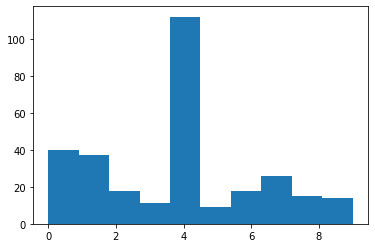

In [24]:
plt.hist(ads_selected)